# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("https://raw.githubusercontent.com/RyanErm/linearModels/refs/heads/main/data/airbnb_hw.csv")

In [115]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [116]:
df.isna().sum()

,0
Host Id,0
Host Since,3
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8323
Room Type,0
Zipcode,134
Beds,85
Number of Records,0


In [117]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

In [118]:
df = df.dropna(subset = "Beds")

We know that there is missing data in 4 columns

In [119]:
df = df.dropna(subset = "Host Since")

Dropped the three rows with no host data. I want to look at that column, neighbourhood, room type, and beds. To have all of these variables clean, I have to clean host since to a numerical value. I also dropped the rows where there was no bed data

In [120]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN


In [121]:
df['Start Year'] = pd.to_numeric(df['Host Since'].str[-4:])
df['Years Hosting'] = 2025-df['Start Year']

In [122]:
df['Years Hosting'].unique()

array([17, 16, 15, 14, 13, 12, 11, 10])

In [123]:
df['Beds'].unique()


array([ 3.,  1.,  2.,  4.,  5.,  6., 10.,  7.,  8., 12.,  0., 16.,  9.,
       11.])

In [124]:
df['Price'] = df['Price'].str.replace(",", "")
df['Price'] = pd.to_numeric(df['Price'])

In [125]:
df.isna().sum()

,0
Host Id,0
Host Since,0
Name,0
Neighbourhood,0
Property Type,3
Review Scores Rating (bin),8279
Room Type,0
Zipcode,133
Beds,0
Number of Records,0


In [126]:
df.shape

(30390, 15)

Now we have clean versions of the columns we want to use! Time to do some eda for Years Hosing, Neighborhood,

<Axes: xlabel='Years Hosting', ylabel='Beds'>

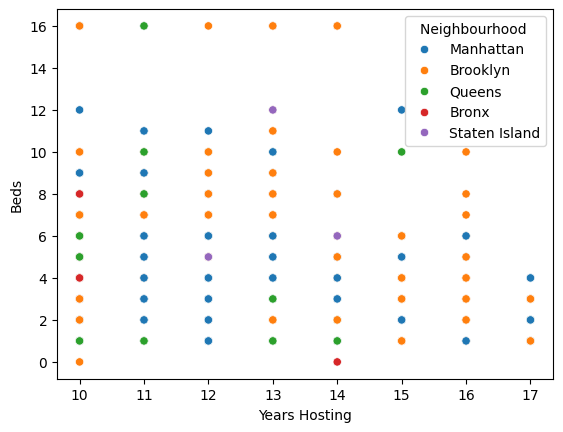

In [127]:
sns.scatterplot(data = df, x = 'Years Hosting', y = 'Beds', hue = "Neighbourhood ")

Looks like brooklyn has some houses with a lot of beds. This isnt the best plot though, lets to do a bar plot

<Axes: >

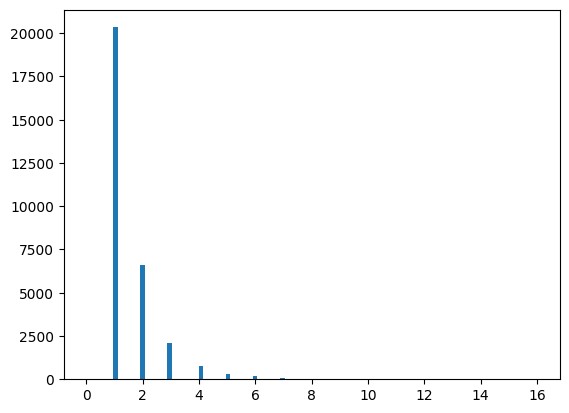

In [128]:
df['Beds'].hist(bins=100,grid=False)

<Axes: >

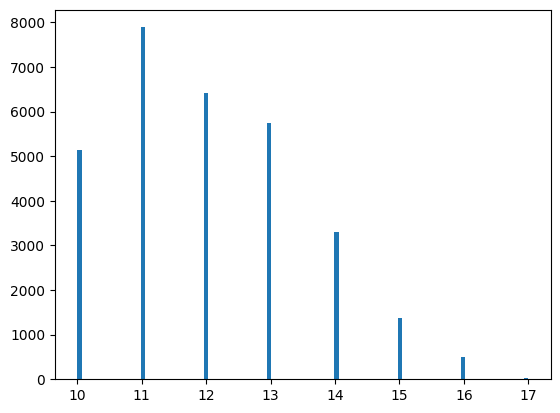

In [129]:
df['Years Hosting'].hist(bins=100,grid=False)

We can see that there are a lot of 1 bed apartments and a lot of people have been hosting for around 11 years.

<Axes: xlabel='Beds', ylabel='Density'>

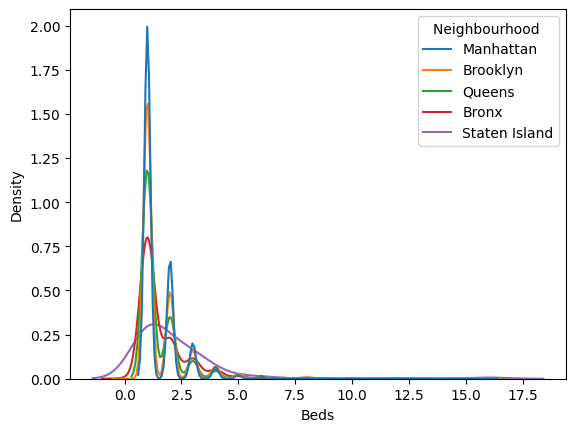

In [130]:
sns.kdeplot( data=df, x="Beds", hue="Neighbourhood ", common_norm=False)

A lot of 1 bed apartments in manhattan and brooklyn. Staten Island seems to have a wider distribution of bed numbers.

Thats enough EDA for now

In [131]:
df

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Start Year,Years Hosting
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN,2008,17
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0,2008,17
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149,100.0,2008,17
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250,100.0,2008,17
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90,94.0,2008,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN,2015,10
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN,2015,10
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN,2015,10
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN,2015,10


In [132]:
one_hot_data_neighborhouds = pd.get_dummies(df['Neighbourhood '], dtype=float,drop_first=False)
one_hot_data_property_types = pd.get_dummies(df['Room Type'], dtype=float,drop_first=False)
regular_data = df.iloc[:, [8,14]]
print(regular_data)
new_data = pd.concat([regular_data, one_hot_data_neighborhouds, one_hot_data_property_types], axis=1)
new_data
price = df.iloc[:, 11]

       Beds  Years Hosting
3       3.0             17
4       3.0             17
5       1.0             17
6       1.0             17
7       1.0             17
...     ...            ...
30473   5.0             10
30474   2.0             10
30475   1.0             10
30476   1.0             10
30477   1.0             10

[30390 rows x 2 columns]


In [157]:
new_data

,Beds,Years Hosting,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
3,3.0,17,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,3.0,17,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1.0,17,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,17,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1.0,17,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
30473,5.0,10,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
30474,2.0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30475,1.0,10,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30476,1.0,10,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [150]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data, price, test_size=0.2, random_state=100)

In [151]:
#all variables #not gonna be good
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)


The r squared value for training data:
0.18912806944508198
The r squared value for testing data data:
0.15330037955393738
The RMSE for training data:
195.33605307834358
The RMSE for testing daata:
87.25918088068649


In [158]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[["Beds", "Years Hosting"]], price, test_size=0.2, random_state=100)

In [159]:
X_train_

,Beds,Years Hosting
20686,1.0,11
3086,1.0,14
21572,1.0,11
7373,1.0,13
18045,1.0,11
...,...,...
12166,1.0,12
24498,2.0,11
14200,2.0,12
23394,2.0,11


In [160]:
#Just years hosting and number of beds, seemed to do worse
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)

The r squared value for training data:
0.10652000422092933
The r squared value for testing data data:
0.07834302315501285
The RMSE for training data:
189.4918883431021
The RMSE for testing daata:
84.20755482563108


In [161]:
new_data.columns

Index(['Beds', 'Years Hosting', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room'],
      dtype='object')

In [162]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[['Entire home/apt', 'Private room', 'Shared room']], price, test_size=0.2, random_state=100)

In [163]:
#Just on the Apartment type, not very good still
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)

The r squared value for training data:
0.11114937745495579
The r squared value for testing data data:
0.09577106482541142
The RMSE for training data:
189.21371333223547
The RMSE for testing daata:
83.87379392035551


In [164]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[['Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room']], price, test_size=0.2, random_state=100)

In [165]:
#Apartment Type and neighbourhood. Same level.
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)

The r squared value for training data:
0.12948987530608358
The r squared value for testing data data:
0.11190539534632793
The RMSE for training data:
190.51218266916965
The RMSE for testing daata:
84.64292008644514


The model that does the best is the one that takes the most variables into account. That being said, it does not do that well, because I am only feeding it 3 or 4 variables. Onto the partial correlation plots for beds and years hosting because those are the only two numerical variables that I am working with.

In [170]:
bed_df = pd.DataFrame(new_data['Beds'])
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(bed_df, price, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']




from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[[ 'Years Hosting', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room']], bed_df, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
test = res_data.predict(X_test_)
test_df1 = pd.DataFrame(test, columns = ['Predictions'])
test_df1['Y_values'] = y_test_
test_df1['Residuals'] = test_df1['Y_values']-test_df1['Predictions']


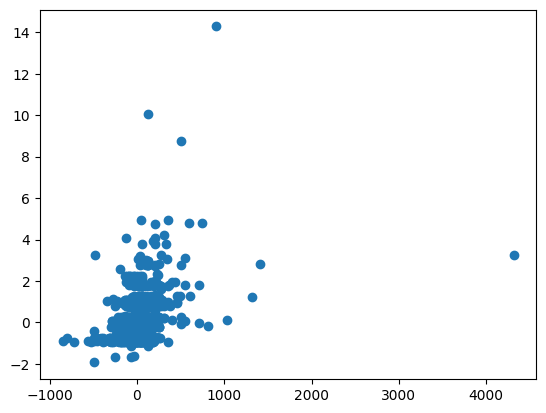

In [171]:
plt.scatter(x = test_df['Residuals'], y = test_df1['Residuals'])

In [172]:
years_df = pd.DataFrame(new_data['Years Hosting'])
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(years_df, price, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']




from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[[ 'Beds', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room']], years_df, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
test = res_data.predict(X_test_)
test_df1 = pd.DataFrame(test, columns = ['Predictions'])
test_df1['Y_values'] = y_test_
test_df1['Residuals'] = test_df1['Y_values']-test_df1['Predictions']


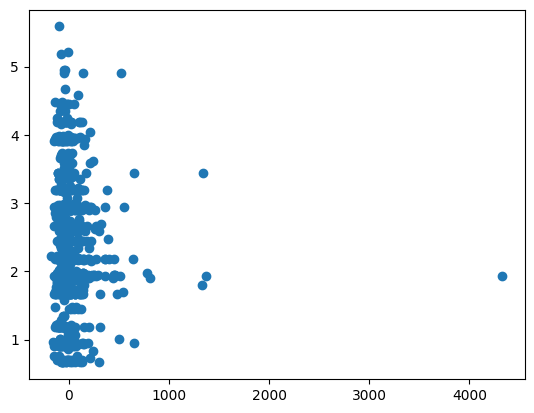

In [173]:
plt.scatter(x = test_df['Residuals'], y = test_df1['Residuals'])

It seems like neither of the numerical variables have that linear of a relationship. Maybe beds does, but certainly not years hosting

In [177]:
new_data['Beds_arcsin'] = np.arcsinh(new_data['Beds'])
new_data['Years Hosting_arcsin'] = np.arcsinh(new_data['Years Hosting'])
new_data.columns

Index(['Beds', 'Years Hosting', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
       'Beds_arcsin', 'Years Hosting_arcsin'],
      dtype='object')

In [181]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[['Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
       'Beds_arcsin', 'Years Hosting_arcsin']], price, test_size=0.2, random_state=100)

In [182]:
#all variables but beds and years hosting are the arcsin version. This seems to increase the error.
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)

The r squared value for training data:
0.18009275490197285
The r squared value for testing data data:
0.1509185291685059
The RMSE for training data:
194.53547504947326
The RMSE for testing daata:
86.74908624917227


In [183]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(new_data[['Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Staten Island', 'Entire home/apt', 'Private room', 'Shared room',
       'Beds', 'Years Hosting_arcsin']], price, test_size=0.2, random_state=100)

In [184]:
#all variables but only the years hosting is arcsinh. Pretty similar to the one before
from sklearn.linear_model import LinearRegression
res_data = LinearRegression(fit_intercept=False).fit(X_train_, y_train_)
print("The r squared value for training data:")
print(res_data.score(X_train_, y_train_))
print("The r squared value for testing data data:")
print(res_data.score(X_test_, y_test_))







train = res_data.predict(X_train_)
train_df = pd.DataFrame(train, columns = ['Predictions'])
train_df['Y_values'] = y_train_
train_df['Residuals'] = train_df['Y_values']-train_df['Predictions']
print("The RMSE for training data:")
RMSE = np.sqrt(1/train_df.shape[0]*(np.sum(np.square(train_df['Residuals']))))
print(RMSE)

test = res_data.predict(X_test_)
test_df = pd.DataFrame(test, columns = ['Predictions'])
test_df['Y_values'] = y_test_
test_df['Residuals'] = test_df['Y_values']-test_df['Predictions']
print("The RMSE for testing daata:")
RMSE = np.sqrt(1/test_df.shape[0]*(np.sum(np.square(test_df['Residuals']))))
print(RMSE)

The r squared value for training data:
0.18914098927232215
The r squared value for testing data data:
0.15332460495746403
The RMSE for training data:
195.3387468510675
The RMSE for testing daata:
87.25669292909738


The complex model is better than the other simpler ones because it takes into account more information. One thing to note is that taking the arc sin of the years hosted seemed to fit the model too much to the training data, as the r sqaured for training increased, but decreased for testing.

Over all this was a really good lab to complete. I am not sure if I am doing everything right because my r squared values are really low, but that might just be from the fact that I was only focusing on a couple of variables, and not all of them. Working on the questions was good because I was able to experiment around with how many variables I wanted to input into the model. Too few seemed to underfit the model and the r sqaured was even lower then normal. As I added more variables, the r squared rose, but never to anything that high. Definitely a more complex model is better to use as there is more information. The problem with this is that it might take more computing time if it is a lot of data.